### Modelo de Regresion Random Forest (Bosques aleatorios)

Es similar a arboles de decision pero miles o millones de estos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\regresion_arboles.csv')

In [3]:
df.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [4]:
df.shape

(10, 3)

#### Dummys y Missing no hay

In [6]:
df.isnull().value_counts()

Position  Level  Salary
False     False  False     10
dtype: int64

Las variables a tratar no requieren dummificar

#### Separar variables dependiente/independiente

In [7]:
x=df.iloc[:,[1]].values # [[]] para que sea un array de arrays o sea matriz y luego no tenga que hacer el reshape en los modelos
y=df.iloc[:,[2]].values

#### Normalizacion/estandarizacion en este modelo SI que hay que hacerlo.

In [8]:
from sklearn.preprocessing import StandardScaler


In [9]:
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
sc_y=StandardScaler()
y=sc_y.fit_transform(y)

#### Crear el modelo Random Forest


* Parametros:
    
        - n_estimators: numero de arboles, por defecto 100. Habitualmente entre 300 y 1000.
        - criterion: squared_error, absolute_error, friedman_mse, poisson. Por defecto squared_error
        - max_depth: profundidad
        - min_samples_split: numero de muestras minimo
        - min_samples_leaf: numero de muestras maximo
        - max_features: maximo numero de caracteristicas. Por defecto 'auto'. El modelo probará con una, con dos, etc.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
reg_randomForest=RandomForestRegressor(n_estimators=300, criterion='squared_error', max_features='auto', random_state=1987)
reg_randomForest.fit(x,y)

C:\Users\carolina\AppData\Local\Temp\ipykernel_14124\520699188.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_randomForest.fit(x,y)
C:\Users\carolina\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', n_estimators=300, random_state=1987)

#### Prediccion para 6,5

In [29]:
y_reg_randomForest=reg_randomForest.predict(sc_x.fit_transform([[6.5]]))
sc_y.inverse_transform([[y_reg_randomForest[0]]]) # paso de 116K con 10, a 119,8K con 100 y a 120K con 300 

array([[120000.]])

##### Evaluacion del modelo (r2, mae,mse)

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [30]:
r2_reg_randomForest=r2_score(y, reg_randomForest.predict(x) ) 
mae_reg_randomForest=mean_absolute_error(y, reg_randomForest.predict(x))
mse_reg_randomForest=mean_squared_error(y, reg_randomForest.predict(x))
print(f'Estadisticos de la regresion por Bosque Aleatorio\n r2: {r2_reg_randomForest:.2f} \n mae: {mae_reg_randomForest:.2f} \n mse: {mse_reg_randomForest:.2f}')

# R2 0,92 esta muy bien. Pasa a r2 = 0,93 con 100 estimadores. A 0.95 con 300 estimadores.
# mae y mse bajos

Estadisticos de la regresion por Bosque Aleatorio
 r2: 0.95 
 mae: 0.12 
 mse: 0.05


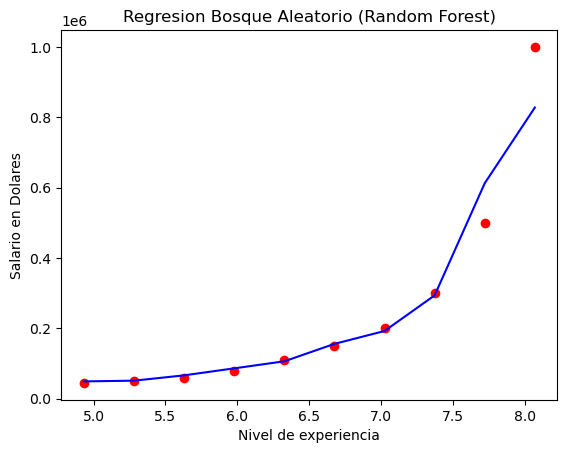

In [31]:
plt.title('Regresion Bosque Aleatorio (Random Forest)')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en Dolares')
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(reg_randomForest.predict(x).reshape(-1, 1)), color='blue')
plt.show()

Grafica ajustada para mejor visualiacion del arbol

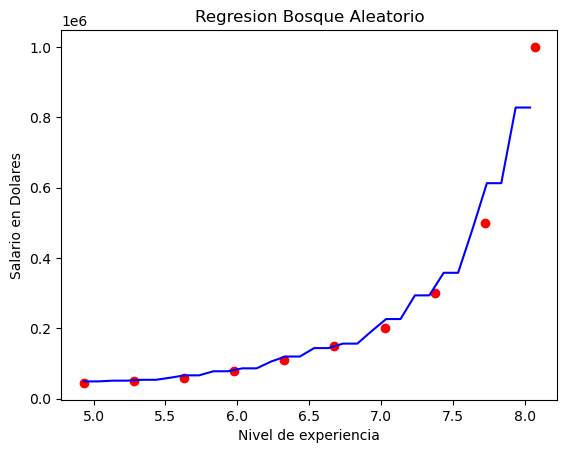

In [32]:
plt.title('Regresion Bosque Aleatorio')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en Dolares')

x_grid=np.arange(min(x),max(x), 0.1)
x_grid=x_grid.reshape(len(x_grid),1)

plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x_grid), sc_y.inverse_transform(reg_randomForest.predict(x_grid).reshape(-1, 1)), color='blue')
plt.show()

Este modelo es mas creible que el de Arboles de Desicion.

Ahora miramos de ponerle un mayor numero de estimadores en la creacion del modelo, de 10 a 100 por ejemplo. Mejora a 0,93 el r2.
La grafica se ve mejor. Con 300 a 0,95. 
Con 1000 arboles estimadores baja el R2. No mejora. Con 300 va mejor.

In [7]:
x=df.iloc[:,[1]].values # [[]] para que sea un array de arrays o sea matriz y luego no tenga que hacer el reshape en los modelos
y=df.iloc[:,[2]].values

#### Normalizacion/estandarizacion en este modelo SI que hay que hacerlo.

In [8]:
from sklearn.preprocessing import StandardScaler
